In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [3]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# lec06. 이미지증강 Augmentation


# Data Load

In [4]:
from keras.datasets import mnist

In [5]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
y_train[:1], X_train[:1].shape, X_train[:1]

(array([5], dtype=uint8),
 (1, 28, 28),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 

# 이미지 증강
- https://keras.io/ko/preprocessing/image/ 케라스
- https://ddolcat.tistory.com/690 파이썬으로 하는 법 
- https://docs.opencv.org/4.x/ 더 디테일하게 하는 법
- https://yerimoh.github.io/DL9/ 속성 안내
- https://libertegrace.tistory.com/entry/3-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95%EA%B8%B0%EB%B2%95-Data-Augmentation 속성 안내

<pre>

<b>배치 생성 --> 배치 단위로 루프 --> 학습(fit) 시 순환하면서 데이터 증강</b>

In [7]:
from keras.preprocessing.image import ImageDataGenerator

<pre>
<B>keras.preprocessing.image.ImageDataGenerator(
     rotation_range=0,                        회전
     width_shift_range=0.0,                   이미지 밀기(좌우)                  
     height_shift_range=0.0,                  이미지 밀기(상하)
     brightness_range=None,                   밝기
     zca_whitening=False,                     밝기
     zoom_range=0.0,                          확대/축소 
     fill_mode='nearest', cval=0.0,           빈픽셀 채우기          
     horizontal_flip=False,                   가로 대칭
     vertical_flip=False,                     세로 대칭
     rescale=None,                            /255.0 
     validation_split=0.0,                    8:2</B>
     featurewise_center=False,                이미지 센터에 위치
     samplewise_center=False,                      
     featurewise_std_normalization=False,     색상정규화
     samplewise_std_normalization=False, 
     zca_epsilon=1e-06, 
     shear_range=0.0,                         0~45 각도내 변환
     channel_shift_range=0.0,                 색상보정
     preprocessing_function=None,             
     data_format=None,                 
     dtype=None)

<pre>
<ul> <li><code class="language-plaintext highlighter-rouge">featurewise_center</code>: Boolean. 입력 평균을 데이터 집합 위에 0으로 설정</li> <li><code class="language-plaintext highlighter-rouge">samplewise_center</code>: Boolean. 각 표본 평균을 0으로 설정</li> <li><code class="language-plaintext highlighter-rouge">featurewise_std_normalization</code>: Boolean. 입력을 데이터 집합(특징맵)의 표준으로 나눔</li> <li><code class="language-plaintext highlighter-rouge">samplewise_std_normalization</code>: Boolean. 각 입력을 표준으로 나눔</li> <li><code class="language-plaintext highlighter-rouge">zca_epsilon</code>: ZCA 미백용 엡실론. 기본값은 1e-6</li> <li><code class="language-plaintext highlighter-rouge">zca_whitening</code>: Boolean. ZCA 화이트닝</li> <li><code class="language-plaintext highlighter-rouge">rotation_range</code>: Int. 무작위 회전에 대한 도(ㅇ) 단위 범위</li> <li><code class="language-plaintext highlighter-rouge">width_shift_range</code>: Float, 이미지를 수평으로 임의로 이동(전체 너비의 대칭)</li> <li><code class="language-plaintext highlighter-rouge">height_shift_range</code>: Float, 이미지를 수직으로 임의로 이동(전체 높이의 대칭)</li> <li><code class="language-plaintext highlighter-rouge">brightness_range</code>: Tuple or list of two floats,밝기 이동 값 선택 범위</li> <li><code class="language-plaintext highlighter-rouge">shear_range</code>: Float, 전단 강도(도 단위로 시계 반대 방향으로 전단 각도)</li> <li><code class="language-plaintext highlighter-rouge">zoom_range</code>: Float or [lower, upper], 무작위 확대/축소 범위입니다. 부동 소수인 경우, [하위, 상한] = [1-dynam_range, 1+dynam_range].</li> <li><code class="language-plaintext highlighter-rouge">channel_shift_range</code>: Float, 무작위 채널 이동 범위</li> <li><code class="language-plaintext highlighter-rouge">fill_mode</code>: One of {“constant”, “nearest”, “reflect” or “wrap”}, “nearest”가 기본 <ul> <li>지정된 모드에 따라 입력 경계를 벗어나는 점이 채워짐</li> <li>constant’: kkkkkkkk[abcd]kkkkkkkk (cval=k)</li> <li>‘nearest’: aaaaaaaa[abcd]dddddddd</li> <li>‘reflect’: abcddcba[abcd]dcbaabcd</li> <li>‘wrap’: abcdabcd[abcd]abcdabcd</li> </ul> </li> <li><code class="language-plaintext highlighter-rouge">cval</code>: Float or Int, 경계를 벗어나는 점에 사용되는 값</li> <li><code class="language-plaintext highlighter-rouge">horizontal_flip</code>: Boolean, 입력을 수평으로 랜덤하게 뒤집음</li> <li><code class="language-plaintext highlighter-rouge">vertical_flip</code>: Boolean. 입력을 수직으로 랜덤하게 뒤집음</li> <li><code class="language-plaintext highlighter-rouge">rescale</code>: 데이터에 제공된 값을 곱함</li> <li><code class="language-plaintext highlighter-rouge">preprocessing_function</code>: 각 입력에 적용될 함수 -&gt; 이미지 크기 조정 및 증강 후에 실행</li> <li><code class="language-plaintext highlighter-rouge">dtype</code>: 생성된 어레이에 사용할 Dtype</li> </ul>

# example

## .flow(x, y)사용한 예시:


<pre>
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#랜덤한 옵션 #max값
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# 특성별 정규화에 필요한 수치를 계산합니다
# (영위상 성분분석 백색화를 적용하는 경우, 표준편차, 평균, 그리고 주성분이 이에 해당합니다)
datagen.fit(x_train)

# 실시간 데이터 증강을 사용해 배치에 대해서 모델을 학습합니다:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)


### 수동 예시
★배치 사이즈 조절 안하면 무한 증강된다 주의 ★★


In [11]:
X_train_cp = X_train.reshape(-1,28,28,1)[:6]
# y_train_cp = y_train.reshape(-1,28,28,1)[:6]
y_train_cp = y_train[:6]
X_train_cp.shape
#y_train_cp.shape

(6, 28, 28, 1)

Epoch 0
Epoch 1


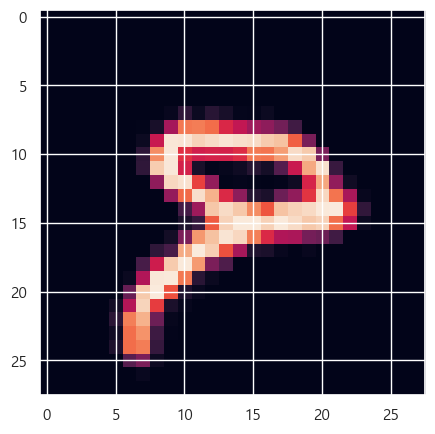

In [26]:
# 다음은 보다 "수동"인 예시입니다
datagen = ImageDataGenerator(rotation_range=50)

plt.figure(figsize=(10,5))
for e in range(2):
    print('Epoch', e) #epoch당 몇번 학습할까
    batches = 0 #★배치 사이즈 조절 안하면 무한 증강된다 주의 ★★
    for x_batch, y_batch in datagen.flow(X_train_cp, y_train_cp, batch_size=1):
        # model.fit(x_batch, y_batch)
        # print(x_batch.reshape(28,28).shape)
        plt.imshow(x_batch.reshape(28,28))
        batches += 1
        if batches >= len(y_batch) / 1: #숫자 : 배치 사이즈   * 샘플 / 배치 사이즈 = step_per_epoch : 한 에포크 당 증강 횟수. 증강 stop
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

In [29]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense,MaxPooling2D
from keras.initializers import GlorotNormal  #Xavier

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
#위 그림 모형대로 모델 쌓기

model = Sequential()

#-------------------- CNN 합성곱 ------------------------
model.add(Conv2D(filters = 16,input_shape=(28,28,1),kernel_size =(5,5),strides=(1, 1),padding="valid",activation='relu',kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")) #
model.add(Conv2D(filters = 16, kernel_size =(5,5), activation='relu')) #필터 사이즈. 그대로 내보내냐 변형해서 내보내냐
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")) 

#------------------- Fully Connected-----------------

model.add(Flatten())
model.add((Dense(units=60,  activation='relu'))) # 히든레이어 : 복잡할 필요 없다.
model.add((Dense(units=10,  activation='softmax'))) # Output
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


Epoch: 0 
1/1 [==============================] - 0s 9ms/step - loss: 35.2192 - accuracy: 0.0000e+00


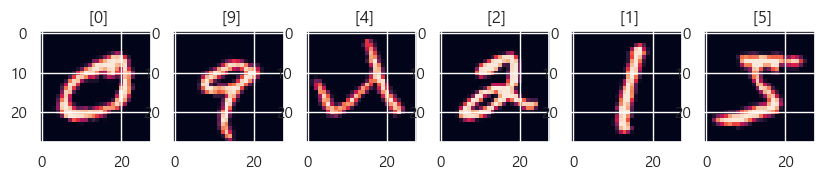

Epoch: 1 
1/1 [==============================] - 0s 6ms/step - loss: 0.5621 - accuracy: 1.0000


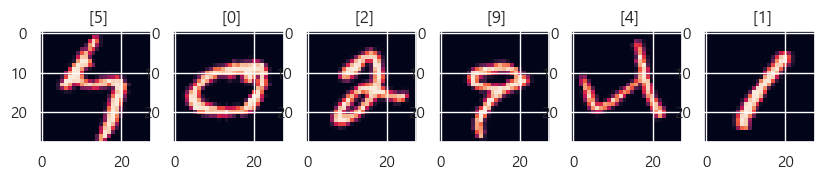

In [31]:
EPOCHS = 2
for e in range(EPOCHS):
    plt.figure(figsize=(10,5))
    
    batches = 0
    print(f"Epoch: {e} ")
    for x_batch, y_batch in datagen.flow(X_train_cp, y_train_cp, batch_size=1): #flow : 무한 루프 반복(break로 멈춰준다)
        model.fit(x_batch, y_batch)
        
        batches += 1 
        
        plt.subplot(1, len(X_train_cp), batches)
        plt.imshow(x_batch.reshape(28,28)) #다시 차원축소해야
        plt.title(f" {y_batch}")
        
        if batches >= len(X_train_cp) / 1:  #step_per_epoch
            break
    plt.show()

## .flow_from_directory(directory)사용한 예시:
    - 디렉토리에 있는 전체 사진 활용
    - 디렉토리(폴더) depth는 반드시 3단 구조여야 한다. ex) datasets/image/aa.png

In [ ]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

test_generator = ImageDataGenerator(rescale=1./255) #테스트는 스케일만 한 이유? -> ★테스트는 증강시키면 안된다.★ 100문제 푸세요 -> 800문제 푸세요(X)

BATCH_SIZE = 256

train_generator = train_datagen.flow_from_directory(
        'data/train',#3단 구조
        target_size=(150, 150), #150*150으로
        batch_size=32, #사진당 32장씩 만들어라
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

# 모델

In [ ]:
#위 그림 모형대로 모델 쌓기

model = Sequential()

#-------------------- CNN 합성곱 ------------------------
model.add(Conv2D(filters = 16,input_shape=(28,28,1),kernel_size =(5,5),strides=(1, 1),padding="valid",activation='relu',kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")) #
model.add(Conv2D(filters = 16, kernel_size =(5,5), activation='relu')) #필터 사이즈. 그대로 내보내냐 변형해서 내보내냐
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")) 

#------------------- Fully Connected-----------------

model.add(Flatten())
model.add((Dense(units=60,  activation='relu'))) # 히든레이어 : 복잡할 필요 없다.
model.add((Dense(units=10,  activation='softmax'))) # Output
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
fit_hisroty = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

In [ ]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()